<a href="https://colab.research.google.com/github/praneash2/machine-learning/blob/main/basic_image_classification_using_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#impoting the fashion mnist dataset
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(train_feature,train_label),(test_image,test_label)=fashion_mnist.load_data()#splitting the dataset into train and test 

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_feature=train_feature/255.0
test_feature=test_image/255.0               

In [ ]:
print(len(test_image))
print(len(test_label))

10000
10000


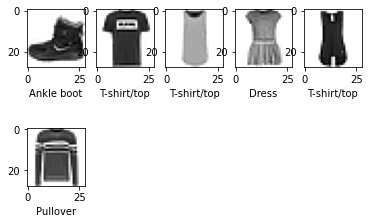

In [ ]:
#plt.figure(figsize=(3,3),dpi=300)
for i in range(6):
  plt.subplot(2,5,i+1)
  plt.xlabel(class_names[train_label[i]])
  plt.imshow(train_feature[i],cmap=plt.cm.binary)
plt.show()

In [ ]:
#buliding the model 
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation="relu")
                                  ,tf.keras.layers.Dense(10)])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics="accuracy")

In [ ]:
model.fit(train_feature,train_label,epochs=20,batch_size=30,verbose=2)

Epoch 1/20
2000/2000 - 5s - loss: 0.4957 - accuracy: 0.8243 - 5s/epoch - 2ms/step
Epoch 2/20
2000/2000 - 4s - loss: 0.3714 - accuracy: 0.8672 - 4s/epoch - 2ms/step
Epoch 3/20
2000/2000 - 4s - loss: 0.3355 - accuracy: 0.8788 - 4s/epoch - 2ms/step
Epoch 4/20
2000/2000 - 4s - loss: 0.3117 - accuracy: 0.8859 - 4s/epoch - 2ms/step
Epoch 5/20
2000/2000 - 4s - loss: 0.2927 - accuracy: 0.8931 - 4s/epoch - 2ms/step
Epoch 6/20
2000/2000 - 4s - loss: 0.2780 - accuracy: 0.8985 - 4s/epoch - 2ms/step
Epoch 7/20
2000/2000 - 4s - loss: 0.2671 - accuracy: 0.9013 - 4s/epoch - 2ms/step
Epoch 8/20
2000/2000 - 4s - loss: 0.2556 - accuracy: 0.9055 - 4s/epoch - 2ms/step
Epoch 9/20
2000/2000 - 4s - loss: 0.2449 - accuracy: 0.9089 - 4s/epoch - 2ms/step
Epoch 10/20
2000/2000 - 4s - loss: 0.2383 - accuracy: 0.9113 - 4s/epoch - 2ms/step
Epoch 11/20
2000/2000 - 4s - loss: 0.2282 - accuracy: 0.9153 - 4s/epoch - 2ms/step
Epoch 12/20
2000/2000 - 4s - loss: 0.2219 - accuracy: 0.9172 - 4s/epoch - 2ms/step
Epoch 13/20
2

In [ ]:
test_loss, test_acc = model.evaluate(test_feature, test_label, verbose=2)

313/313 - 1s - loss: 0.3687 - accuracy: 0.8847 - 526ms/epoch - 2ms/step


In [ ]:
prediction_model=tf.keras.models.Sequential([model,
                                            tf.keras.layers.Activation("softmax")])

In [ ]:
prediction=prediction_model.predict(test_feature)


In [ ]:
print(prediction[0])
label=np.argmax(prediction[0])
print(class_names[label])
print(label)

[2.1208617e-10 6.4482579e-11 1.7851580e-10 4.6546567e-09 1.3347538e-10
 4.0496341e-03 7.3094619e-09 2.4348036e-03 3.6747379e-11 9.9351549e-01]
Ankle boot
9


Ankle boot


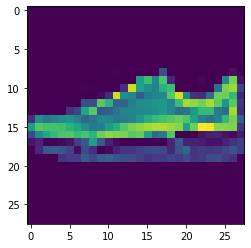

In [ ]:
print(class_names[test_label[0]])
plt.imshow(test_feature[test_label[0]])

In [ ]:
print(len(train_feature))
print(len(train_label))

60000
60000


In [ ]:
import tensorflow as tf
from tensorflow import keras
initial_learning_rate = 0.1
decay_steps = 1.0
decay_rate = 0.5
learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate, decay_steps, decay_rate)


TypeError: ignored